<h1> Оптимизация маркетинговых затрат сервиса по продаже билетов на культурные и спортивные мероприятия</h1>

**Описание проекта:** для отдела маркетинга, на основе данных о визитах, заказах и стоимости привлечения покупателей, необходимо провести анализ эффективности источников привлечения и подготовить рекомендации по оптимизации затрат на каналы привлечения.

**Задачи:** 
- провести анализ основных продуктовых метрик;
- провести анализ источников (каналов) привелечения покупателей;
- определить убыточные и профицитные каналы привлечения.

**Содержание проекта:**

1. [Общая информация](#step1)  
2. [Предобработка данных](#step2)  
3. [Исследовательский анализ данных](#step3)
    - [Продукт](#step3.1)
    - [Продажи](#step3.2) 
    - [Маркетинг](#step3.3) 
4. [Общие выводы и рекомендации](#step4)

<h2>Общая информация<a id="step1"></a></h2> 

Импортируем все необходимые для проекта библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Для удобства управления дальнейшей отрисовкой диаграмм в проекте создадим класс с необходимыми методами и атрибутами:

In [2]:
class CreateChart:
    def __init__(self, data, title, xlabel=0, ylabel=0, figwidth=15, figheight=7, 
                 fmt=0, vmin=0, vmax=0, column=0, bins=0, range=(0,0)):
        '''
        Класс принимает обязательные параметры: датафрейм и название будущей диаграммы.
        data - датафрейм,
        title - желаемый заголовок тепловой карты ('str').

        Также есть необязательные параметры (по умолчанию равны нулю):
        xlabel - название оси Х ('str'), 
        ylabel - название оси Y ('str'), 
        figwidth - ширина полотна диаграммы ('int') - по умолчанию 15, 
        figheight - высота полотна диаграммы ('int') - по умолчанию 7,
        fmt - формат выводимых значений ('str') для тепловой карты (например, '.1%') - по умолчанию 0,
        vmin и vmax - минимальное и максимальное значение, к которым восприимчива тепловая карта, ('int') - по умолчанию 0,
        column - столбец датафрейма ('str') - по умолчанию 0,
        bins - количество бинов в гистограмме ('int') - по умолчанию 0,
        range - диапазон значенний оси X в гистограмме ('tuple') - по умолчанию (0,0).
        '''
        self.data = data
        self.figwidth = figwidth
        self.figheight = figheight
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.fmt = fmt
        self.vmin = vmin
        self.vmax = vmax
        self.column = column
        self.bins = bins
        self.range = range
        

    def set_names(self):
        '''
        Метод устанавливает названия диаграммы и осей.
        '''
        plt.title(self.title, fontsize=22)
        plt.xlabel(self.xlabel, fontsize=16)
        plt.ylabel(self.ylabel, fontsize=16)
        
    
    def get_cohorts_heatmap(self):
        '''
        Метод метод отрисовывает тепловую карту со стандартными для когортного анализа 
        названиями осей ('Lifetime' и 'Cohorts')
        '''
        self.xlabel = 'Lifetime'
        self.ylabel = 'Cohorts'
        
        plt.figure(figsize=(self.figwidth, self.figheight))
        sns.heatmap(data = self.data, 
                    annot=True, 
                    fmt=self.fmt, 
                    linewidths=1, linecolor='gray', 
                    vmin=self.vmin, vmax=self.vmax)
        self.set_names()
        plt.show()
    
    
    def get_plot(self):
        '''
        Метод метод отрисовывает линейную диаграмму plot.
        Название осей (xlabel и ylabel) необходимо задавать при инициализации класса.
        '''
        if self.column==0:  #Если мы не указываем столбец, то диаграмма строиться для всех столбцов датафрейма
            self.data.plot(figsize=(self.figwidth, self.figheight), grid=True)
            self.set_names()
            plt.show()
        else:
            self.data.plot(y=self.column, figsize=(self.figwidth, self.figheight), grid=True)
            self.set_names()
            plt.show()
        
        
    def get_bar_plot(self):
        '''
        Метод метод отрисовывает диаграмму bar.
        Название осей (xlabel и ylabel) необходимо задавать при инициализации класса.
        '''
        self.data.plot(kind='bar', figsize=(self.figwidth, self.figheight), grid=True)
        self.set_names()
        plt.show()
        
        
    def get_hist(self):
        '''
        Метод метод отрисовывает гистограмму.
        Столбец, распределение значений которого хотим посмотреть, названия осей (xlabel и ylabel),
        количество бинов (bins), а также диапазон значений оси Х (range)
        необходимо задавать при инициализации класса.
        '''
        plt.figure(figsize=(self.figwidth, self.figheight))
        self.data[self.column].hist(bins=self.bins, range=self.range)
        self.set_names()
        plt.show()

Изучим структуру датафрейма с данными о посещениях:

In [3]:
visits = pd.read_csv('datasets/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


В данных о визитах присутствует уникальный идентификатор пользователя, время начала и окончания визита, используемое устройство и идентификатор рекламного источника, с которого пользователь перешёл на ресурс.

Изучим структуру датафрейма с данными о заказах:

In [4]:
orders = pd.read_csv('datasets/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


В данных о заказах мы видим уникальный идентификатор пользователя, время и сумму заказа.

Изучим структуру датафрейма с данными о расходах:

In [5]:
costs = pd.read_csv('datasets/costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


В данных о расходах присутствуют идентификаторы рекламных источников, даты и суммы расходов (в сутки) на привлечение пользователей.

Создадим словарь датафреймов:

In [6]:
dfs_dict = {'visits': visits, 'orders': orders, 'costs': costs}

Изучим основную информацию об имеющихся датафреймах:

In [7]:
for key in dfs_dict.keys():
    df = dfs_dict[key]
    print('Датафрейм "{}"'.format(key))
    display(df.info())

Датафрейм "visits"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Датафрейм "orders"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Датафрейм "costs"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

**Выводы:** 
- пропущенные значения отсутствуют;
- необходимо приведение названий столбцов к единому виду;
- столбцы с датами необходимо привести к типу datetime.

<h2>Предобработка данных<a id="step2"></a></h2> 

**Приведём названия столбцов к единому виду**

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [9]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Датафрейм costs не нуждается в смене названий столбцов.

**Приведём столбцы с датами к типу datetime**

In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

**Поиск дубликатов**

In [11]:
for key in dfs_dict.keys(): #Пройдём циклом по словарю датафреймов
    df = dfs_dict[key]
    print('Обнаружено {} дубликатов'.format(df.duplicated().sum()))

Обнаружено 0 дубликатов
Обнаружено 0 дубликатов
Обнаружено 0 дубликатов


Полные дубликаты в наблюдениях всех датафреймов отсутствуют.

Потенциально дубликаты могут не идентифицироваться из-за ошибок в написании строковых значений в столбце 'device' датафрейма visits. Проверим это:

In [12]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

В данном столбце только два уникальных значения. Преобразований не требуется, потенциальные дубликаты отсутствуют.

**Поиск аномалий**

Создадим список столбцов, в которых потенциально могут присутствовать аномальные значения:

In [13]:
anomality_research_columns = [visits.end_ts, visits.start_ts, orders.buy_ts, costs.dt]

Пройдём циклом, чтобы получить общую статистическую информацию:

In [14]:
for column in anomality_research_columns:
    print(column.describe())
    print()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object



Датафрейм costs содержит данные за период с 01.06.2017 по 31.05.2018.

Датафреймы visits и orders содержат данные за период с 01.06.2017 по 01.06.2018. Исключим один день июня 2018 года из дальнейшего рассмотрения:

In [15]:
redundant_date = '2018-06-01'
visits = visits.query('start_ts < @redundant_date')
visits.start_ts.describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [16]:
orders = orders.query('buy_ts < @redundant_date')
orders.buy_ts.describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

Посмотрим на данные ещё раз:

In [17]:
for key in dfs_dict.keys(): #Пройдём циклом по словарю датафреймов
    df = dfs_dict[key]
    print('Датафрейм "{}"'.format(key))
    display(df.info())

Датафрейм "visits"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

Датафрейм "orders"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

Датафрейм "costs"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

**Выводы:** Данные готовы для дальнейшего анализа.

<h2>Исследовательский анализ данных<a id="step3"></a></h2>

<h3>Продукт<a id="step3.1"></a></h3>

**Определим, сколько людей пользуются сервисом в день, неделю, месяц.** 

Для этого в датафрейме visits создадим соответствующие столбцы:

In [18]:
visits['visits_day'] = visits['start_ts'].astype('datetime64[D]')
visits['visits_week'] = visits['start_ts'].astype('datetime64[W]')
visits['visits_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


Число активных пользователей в день (DAU):

In [19]:
dau_total = visits.groupby('visits_day')['uid'].nunique().mean().round()
int(dau_total)

908

Число активных пользователей в неделю (WAU):

In [20]:
wau_total = visits.groupby('visits_week')['uid'].nunique().mean().round()
int(wau_total)

5724

Число активных пользователей в месяц (MAU):

In [21]:
mau_total = visits.groupby('visits_month')['uid'].nunique().mean().round()
int(mau_total)

23228

Рост числа активных пользователей происходит, в основном, за счёт притока новых пользователей, что говорит о хорошей известности на рынке и интересе к площадке. Однако, стоит обратить внимание на показатель оттока. 

**Среднее количество сессий в день:**

In [22]:
mean_sessions_per_day = visits.groupby('visits_day')['uid'].count().mean()
mean_sessions_per_day.round().astype('int')

987

За редким исключением, пользователи совершают одну сессию в день (mean_sessions_per_day / dau_total)

**Длительность сессии:**

Добавим в данные столбец с длительностью сессии:

In [23]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0


Посмотрим на распределение значений длительности сессий. Для этого воспользуемся методом get_hist() класса CreateChart:

In [24]:
# Инициализируем класс, при этом задаём параметры гистограммы:
sess_duration_hist = CreateChart(data=visits, column='session_duration_sec', title='Session duration distribution', 
                            xlabel='Session duration, sec', ylabel='Sessions count', 
                            bins=80, range=(0, 8000), figheight=5)

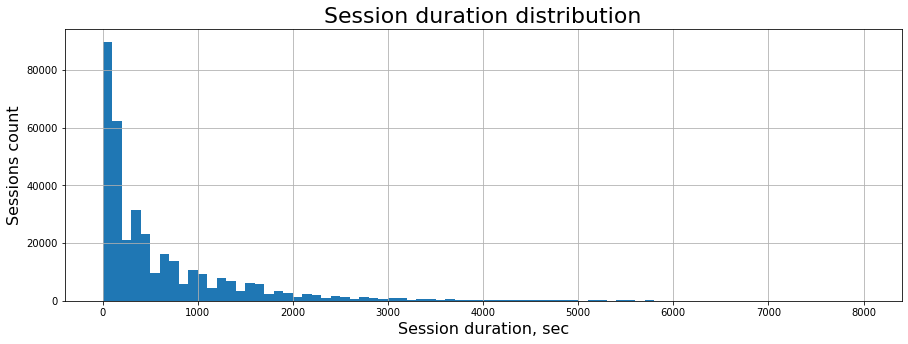

In [25]:
sess_duration_hist.get_hist()

Распределение не является нормальным, поэтому для определения средней продолжительности сессии (метрика ASL) воспользуемся модой:

In [26]:
asl = visits['session_duration_sec'].mode()
int(asl)

60

Типичная сессия длится 60 секунд.

Определим среднее **количество сессий на одного пользователя** по месяцам:

In [27]:
sessions_per_user = visits.groupby('visits_month').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['sessions_number', 'users_number']
sessions_per_user.head()

,sessions_number,users_number
visits_month,,
2017-06-01,16505,13259
2017-07-01,17828,14183
2017-08-01,14355,11631
2017-09-01,23907,18975
2017-10-01,37903,29692


In [28]:
sessions_per_user['sessions_per_user'] = sessions_per_user['sessions_number'] / sessions_per_user['users_number']
sessions_per_user.head()

,sessions_number,users_number,sessions_per_user
visits_month,,,
2017-06-01,16505,13259,1.244815
2017-07-01,17828,14183,1.256998
2017-08-01,14355,11631,1.234202
2017-09-01,23907,18975,1.259921
2017-10-01,37903,29692,1.276539


Посмотрим динамику количества сессий на пользователя по месяцам на диаграмме:

In [29]:
sessions_per_user_plot = CreateChart(data=sessions_per_user, column='sessions_per_user', title='Sessions count per user', 
                            xlabel='Month', ylabel='Sessions count per user', 
                            figheight=5)

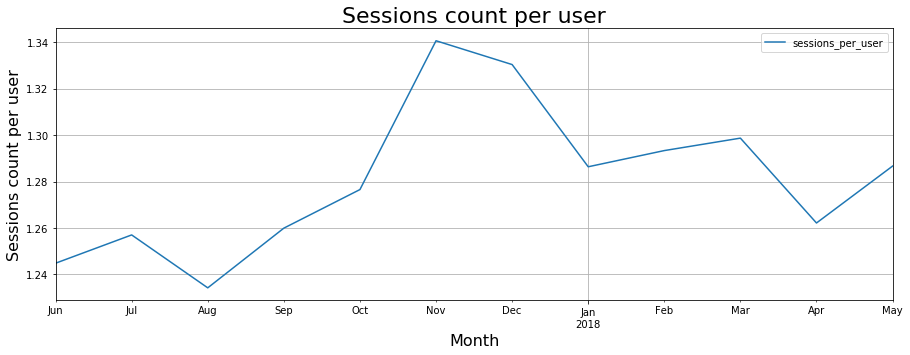

In [30]:
sessions_per_user_plot.get_plot()

Наблюдаем повышенную активность пользователей в ноябре-декабре, что может свидетельствовать о сезонности (необходимо исследование на более длительном периоде)

Посчитаем среднее количество сессий на пользователя за весь период исследования:

In [31]:
sessions_per_user.sessions_per_user.mean()

1.2808894945992668

В среднем, приблизительно один из трёх-четырёх пользователей возвращался на сайт повторно в течение исследуемого периода (среднее количество сессий на одного пользователя, равное 1,28, получается в результате деления 4 (1+1+2) сессий на 3-х пользователей или 5 (1+1+1+2) сессий на 4 пользователей)

**Разделим покупателей на когорты** по первому визиту на сайт, совершённому в определённый месяц:

In [32]:
first_visit_month = visits.groupby('uid')['visits_month'].min()
first_visit_month.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-01
297729379853735   2017-06-01
313578113262317   2017-09-01
325320750514679   2017-09-01
Name: visits_month, dtype: datetime64[ns]

Сменим название данному объекту Series для дальнейшего соединения с основным датафреймом visits:

In [33]:
first_visit_month.name = 'first_visit_month'

Соединим данные о месяце первого посещения с основным датафреймом:

In [34]:
visits = visits.join(first_visit_month, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month,session_duration_sec,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-01


Добавим порядковый номер месяца (относительно месяца первого посещения), в который совершается очередное посещение сайта:

In [35]:
visits['lifetime'] = (visits['visits_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month,session_duration_sec,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-01,0


Разделим пользователей по когортам:

In [36]:
cohorts = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'})
cohorts = cohorts.rename(columns={'uid':'users_counts'}).reset_index()
cohorts.head()

,first_visit_month,lifetime,users_counts
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Определим первоначальное количество пользователей в каждой когорте:

In [37]:
initial_users_count = cohorts[cohorts['lifetime']==0][['first_visit_month', 'users_counts']]
initial_users_count = initial_users_count.rename(columns={'users_counts':'cohort_users'})
initial_users_count

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим данные по когортам с исходным количеством пользователей в когорте:

In [38]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts.head()

,first_visit_month,lifetime,users_counts,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Рассчитаем Retention Rate:

In [39]:
cohorts['retention'] = cohorts['users_counts'] / cohorts['cohort_users']
cohorts.head()

,first_visit_month,lifetime,users_counts,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Для удобства прочтения преобразуем даты в столбце first_visit_month в строковые значения в формате даты:

In [40]:
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m')

Построим сводную таблицу и создадим тепловую карту:

In [41]:
cohorts_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum')
cohorts_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


In [42]:
retentoin_heatmap = CreateChart(data=cohorts_pivot, title='Retention Rate', fmt='.1%', vmin=0, vmax=0.08)

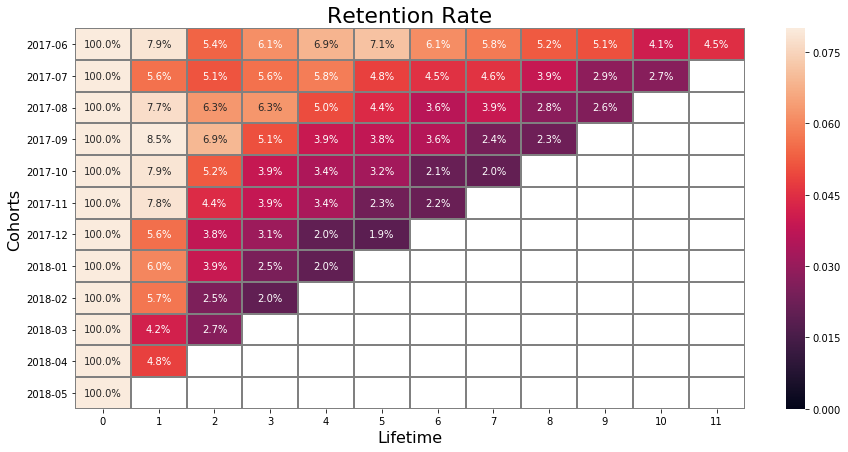

In [43]:
retentoin_heatmap.get_cohorts_heatmap()

На второй месяц на сайт возвращается только 4,2%-8,5% (в зависимости от когорты) В целом, доля возвращающихся пользователей в последующие месяцы существования когорт продолжает снижаться. От когорты к когорте наблюдается тенденция к сокращению доли пользователей, возвращающихся на второй месяц. 

**Выводы:** 

1. Показатели MAU и WAU говорят о том, что сервис вызывает интерес у пользователей. В неделю на сайт приходит почти 6 тыс. новых пользователей, в месяц - более 23 тысяч. 
2. В среднем, сервисом пользуются 908 посетителей в день с типичной длительностью сессии 60 секунд.
3. Приблизительно один из трёх-четырёх пользователей возвращается на сайт повторно.
4. В ноябре-декабре повторные посещения делают чуть больше пользователей, чем в другие месяцы.
5. Во второй месяц существования когорт возврат пользователей составляет от 4% до 8% и продолжает сокращаться с течением времени.

<h3>Продажи<a id="step3.2"></a></h3>

Добавим в датафрейм orders столбец с месяцем совершения заказа:

In [44]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Определим месяц первой покупки для каждого покупателя и отобразим его в отдельном столбце:

In [45]:
first_order_month = orders.groupby('uid')['order_month'].min()
first_order_month.head()

uid
313578113262317    2018-01-01
1575281904278712   2017-06-01
2429014661409475   2017-10-01
2464366381792757   2018-01-01
2551852515556206   2017-11-01
Name: order_month, dtype: datetime64[ns]

Переименуем полученный объект Series для последующего соединения с исходным датафреймом:

In [46]:
first_order_month.name = 'first_order_month'

Присоединим данные о месяце первого заказа к таблице заказов:

In [47]:
orders = orders.join(first_order_month, on='uid')
orders.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Добавим порядковые номера месяцев (относительно месяца первого заказа), в которые совершаются заказы:

In [48]:
orders['lifetime'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['lifetime'] = orders['lifetime'].round().astype('int')
orders.head()

,buy_ts,revenue,uid,order_month,first_order_month,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0


С точки зрения оценки каналов привлечения покупателей важно понимать, посредством какого канала и устройства покупатель впервые посетил сайт. Определим это по данным датафрейма visits. Сначала определим день и время первого посещения:

In [49]:
first_visit_time = visits.groupby('uid')['start_ts'].min()
first_visit_time.name = 'first_visit_time'
first_visit_time.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_visit_time, dtype: datetime64[ns]

Добавим столбец с днём первого посещения ресурса в датафрейм visits:

In [50]:
visits = visits.join(first_visit_time, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_day,visits_week,visits_month,session_duration_sec,first_visit_month,lifetime,first_visit_time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01,0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-01,0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-01,2,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-01,0,2017-12-27 14:06:00


Определим устройство и канал привлечения пользователя при первом посещении ресурса:

In [51]:
first_visit_device_and_source = visits.query('start_ts==first_visit_time')[['uid', 'device', 'source_id']]
first_visit_device_and_source.head()

,uid,device,source_id
0,16879256277535980062,touch,4
1,104060357244891740,desktop,2
2,7459035603376831527,touch,5
4,9969694820036681168,desktop,3
5,16007536194108375387,desktop,5


Перед добавлением этой информации в датафрейм orders, рассчитаем общую сумму выручки за рассматриваемый период:

In [52]:
revenue_total = orders['revenue'].sum().round(2)
revenue_total

252053.78

Соединим датафреймы orders и first_visit_device_and_source. 

In [53]:
orders = pd.merge(orders, first_visit_device_and_source, on='uid')
orders.sample(5)

,buy_ts,revenue,uid,order_month,first_order_month,lifetime,device,source_id
17801,2017-12-21 20:29:00,0.98,17376907845896866263,2017-12-01,2017-10-01,2,desktop,5
24297,2017-11-27 01:24:00,4.28,10290961768132559858,2017-11-01,2017-11-01,0,desktop,4
44195,2018-03-28 12:02:00,3.67,13873369879396678180,2018-03-01,2018-03-01,0,touch,4
26574,2018-02-01 10:40:00,16.74,10343016064897450067,2018-02-01,2017-12-01,2,desktop,2
46413,2018-04-23 13:56:00,1.47,2803540955628004912,2018-04-01,2018-04-01,0,touch,10


Снова посчитаем сумму выручки:

In [54]:
orders['revenue'].sum().round(2)

252053.78

Проверим наличие пропущенных значений:

In [55]:
orders.isna().sum()

buy_ts               0
revenue              0
uid                  0
order_month          0
first_order_month    0
lifetime             0
device               0
source_id            0
dtype: int64

Общая сумма выручки до слияния таблиц равна сумме выручки после слияния, пропущенные значения отсутствуют. Соединение датафреймов прошло корректно, потерь данных нет.

Теперь мы знаем источник привелечения и используемое утройство по каждому пользователю. Добавим данные о размере когорты, к которой принадлежит пользователь (количество уникальных покупателей по месяцу первого заказа):

In [56]:
cohorts_size = orders.groupby('first_order_month')['uid'].nunique()
cohorts_size.name = 'cohort_size'
cohorts_size

first_order_month
2017-06-01    2023
2017-07-01    1923
2017-08-01    1370
2017-09-01    2581
2017-10-01    4340
2017-11-01    4081
2017-12-01    4383
2018-01-01    3373
2018-02-01    3651
2018-03-01    3533
2018-04-01    2276
2018-05-01    2988
Name: cohort_size, dtype: int64

Добавим эти данные в датафрейм orders:

In [57]:
orders = orders.join(cohorts_size, on='first_order_month')
orders.head()

,buy_ts,revenue,uid,order_month,first_order_month,lifetime,device,source_id,cohort_size
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0,desktop,1,2023
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0,desktop,2,2023
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0,desktop,2,2023
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0,desktop,2,2023
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0,desktop,3,2023


Приведём данные к помесячным показателям (в разрезе устройств и сточников привлечения). Определим для каждой когорты помесячные показатели количества заказов, покупателей и выручки:

In [58]:
monthly_data = (orders
    .groupby(['first_order_month', 'order_month', 'lifetime', 'device', 'source_id', ])
    .agg({'cohort_size': 'mean', 'uid': ['count','nunique'], 'revenue': 'sum'})
    )
monthly_data.columns = ['cohort_size', 'orders_counts', 'customers_counts', 'revenue']
monthly_data = monthly_data.reset_index()
monthly_data.head()

,first_order_month,order_month,lifetime,device,source_id,cohort_size,orders_counts,customers_counts,revenue
0,2017-06-01,2017-06-01,0,desktop,1,2023,233,163,1249.17
1,2017-06-01,2017-06-01,0,desktop,2,2023,235,191,918.33
2,2017-06-01,2017-06-01,0,desktop,3,2023,618,564,2542.73
3,2017-06-01,2017-06-01,0,desktop,4,2023,384,339,1578.72
4,2017-06-01,2017-06-01,0,desktop,5,2023,377,319,1644.60


Распределим данные о заказах по когортам без учёта источников привлечения пользователей и устройств, с которых пользователи посещают сайт:

In [59]:
orders_cohorts = (monthly_data
    .groupby(['first_order_month', 'order_month', 'lifetime'])
    .agg({'cohort_size': 'mean', 'orders_counts':'sum', 'customers_counts':'sum', 'revenue':'sum'})
    .reset_index()
    )
orders_cohorts.head()

,first_order_month,order_month,lifetime,cohort_size,orders_counts,customers_counts,revenue
0,2017-06-01,2017-06-01,0,2023,2354,2023,9557.49
1,2017-06-01,2017-07-01,1,2023,177,61,981.82
2,2017-06-01,2017-08-01,2,2023,174,50,885.34
3,2017-06-01,2017-09-01,3,2023,226,54,1931.30
4,2017-06-01,2017-10-01,4,2023,292,88,2068.58


Определим помесячно среднее **количество покупок на каждого покупателя** с разбивкой по когортам:

In [60]:
orders_cohorts['orders_per_customer'] = orders_cohorts['orders_counts'] / orders_cohorts['customers_counts']
orders_cohorts.head()

,first_order_month,order_month,lifetime,cohort_size,orders_counts,customers_counts,revenue,orders_per_customer
0,2017-06-01,2017-06-01,0,2023,2354,2023,9557.49,1.163618
1,2017-06-01,2017-07-01,1,2023,177,61,981.82,2.901639
2,2017-06-01,2017-08-01,2,2023,174,50,885.34,3.480000
3,2017-06-01,2017-09-01,3,2023,226,54,1931.30,4.185185
4,2017-06-01,2017-10-01,4,2023,292,88,2068.58,3.318182


Для удобства прочтения преобразуем даты в столбце first_visit_month в строковые значения в формате даты:

In [61]:
orders_cohorts['first_order_month'] = orders_cohorts['first_order_month'].dt.strftime('%Y-%m')

Построим сводную таблицу и создадим тепловую карту:

In [62]:
orders_per_customer_cohorts_pivot = orders_cohorts.pivot_table(
    index='first_order_month',
    columns='lifetime',
    values='orders_per_customer',
    aggfunc='mean')
orders_per_customer_cohorts_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.163618,2.90164,3.48,4.18519,3.31818,3.25373,4.45161,3.70213,3.65517,3.4,2.13333,1.62264
2017-07,1.136765,1.92308,2.10526,1.625,1.46939,2.15789,1.69444,1.28205,1.38095,1.09091,2.03846,
2017-08,1.118978,1.86207,1.88679,1.84091,2.125,1.9375,1.63333,1.77273,2.42105,1.48387,,
2017-09,1.136381,1.68462,1.61,2.21622,1.28846,1.70312,1.63636,1.51351,1.4186,,,
2017-10,1.143779,1.52427,1.31707,1.32609,1.3871,1.43056,1.53571,1.86567,,,,
2017-11,1.179368,1.78829,1.51667,1.99057,1.67901,1.22917,1.64516,,,,,
2017-12,1.152635,1.84932,1.96117,1.84536,1.72,1.66667,,,,,,
2018-01,1.121554,1.96491,1.91566,1.48837,1.73333,,,,,,,
2018-02,1.121611,1.88136,1.43103,1.79487,,,,,,,,


In [63]:
orders_per_customer_heatmap = CreateChart(data=orders_per_customer_cohorts_pivot, 
                                          title='Order counts per customer', 
                                          fmt='.2f', vmin=0, vmax=4)

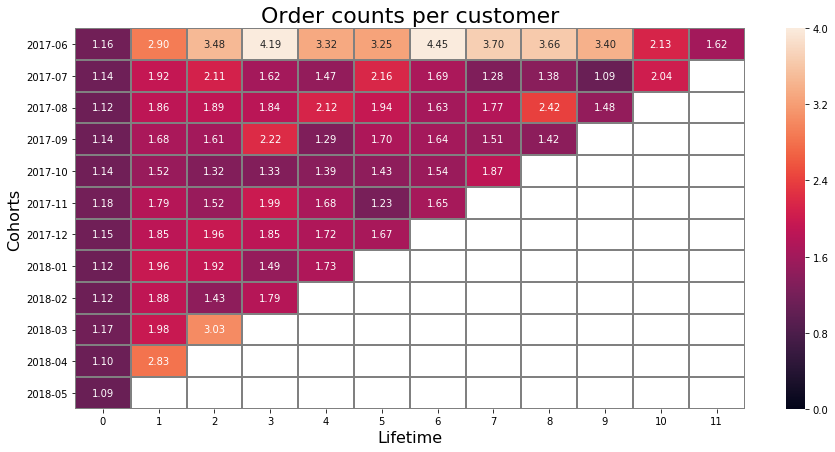

In [64]:
orders_per_customer_heatmap.get_cohorts_heatmap()

Выделяется когорта июня 2017 года, в которой покупатели совершали более трёх заказов в месяц на протяжении 8 месяцев из 12-ти. Хорошая тенденция в когортах марта-апреля 2018 года, где количество повторных покупок на пользователя на второй и третий месяцы существования когорты в 2 раза выше, чем в большинстве остальных когорт. 

В целом, в когортах сохраняются средние показатели количества заказов на одного покупателя, периодически увеличиваясь через каждые 3-4  месяца жизни когорты.

Рассчитаем количество заказов на одного покупателя в средней когорте:

In [65]:
mean_cohort_orders_per_customer = orders_per_customer_cohorts_pivot.mean(axis=0)
mean_cohort_orders_per_customer

lifetime
0     1.135603
1     2.016674
2     2.025814
3     2.034730
4     1.840059
5     1.911234
6     2.099438
7     2.027218
8     2.218946
9     1.991593
10    2.085897
11    1.622642
dtype: float64

Рассчитаем среднее количество заказов на одного покупателя в исследуемом периоде:

In [66]:
mean_cohort_orders_per_customer.mean().round(1)

1.9

Средний покупатель делает почти 2 заказа в месяц.

**Средний чек**

В данные о когортах добавим столбец со значениями среднего чека:

In [67]:
orders_cohorts['revenue_per_customer'] = (orders_cohorts['revenue'] / orders_cohorts['customers_counts']).round(2)
orders_cohorts.head()

,first_order_month,order_month,lifetime,cohort_size,orders_counts,customers_counts,revenue,orders_per_customer,revenue_per_customer
0,2017-06,2017-06-01,0,2023,2354,2023,9557.49,1.163618,4.72
1,2017-06,2017-07-01,1,2023,177,61,981.82,2.901639,16.10
2,2017-06,2017-08-01,2,2023,174,50,885.34,3.480000,17.71
3,2017-06,2017-09-01,3,2023,226,54,1931.30,4.185185,35.76
4,2017-06,2017-10-01,4,2023,292,88,2068.58,3.318182,23.51


Построим сводную таблицу и создадим тепловую карту:

In [68]:
revenue_per_customer_cohorts_pivot = orders_cohorts.pivot_table(
    index='first_order_month',
    columns='lifetime',
    values='revenue_per_customer',
    aggfunc='mean')
revenue_per_customer_cohorts_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,16.1,17.71,35.76,23.51,22.21,31.01,25.03,19.3,27.23,25.68,9.8
2017-07,6.01,12.4,21.04,10.79,6.94,7.9,6.42,6.99,7.38,12.86,11.51,
2017-08,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,,
2017-09,5.64,22.19,13.45,138.67,19.88,26.1,27.44,16.96,11.04,,,
2017-10,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,,,,
2017-11,5.15,7.34,6.79,12.51,7.46,4.58,7.56,,,,,
2017-12,4.74,7.82,39.37,48.14,27.43,23.52,,,,,,
2018-01,4.14,8.72,12.37,11.2,4.7,,,,,,,
2018-02,4.16,8.61,4.94,6.94,,,,,,,,


In [69]:
aov_heatmap = CreateChart(data=revenue_per_customer_cohorts_pivot, 
                                          title='Average order valuer', 
                                          fmt='.2f', vmin=0, vmax=40)

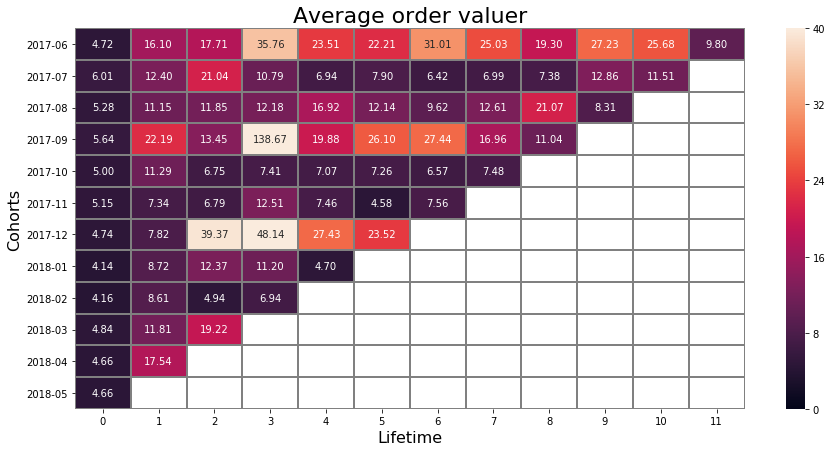

In [70]:
aov_heatmap.get_cohorts_heatmap()

Распределение среднего чека в средней когорте по месяцам:

In [71]:
mean_cohort_revenue_per_customer = revenue_per_customer_cohorts_pivot.mean(axis=0).round(2)
mean_cohort_revenue_per_customer

lifetime
0      4.92
1     12.27
2     15.35
3     31.51
4     14.24
5     14.82
6     14.77
7     13.81
8     14.70
9     16.13
10    18.60
11     9.80
dtype: float64

**Средний чек среднего покупателя** за весь период исследования:

In [72]:
mean_revenue_per_customer = mean_cohort_revenue_per_customer.mean().round(2)
mean_revenue_per_customer

15.08

Аномально высокий средний чек в когорте сентября 2017 года соответствует декабрю 2017 года, что может быть связано с разовыми крупными закупками одного (или группы) покупателя в предпраздничный период. 

В когорте декабря 2017 года наблюдаем аналогичный резкий рост среднего чека на 3-4 месяцы жизни когорты (февраль-март 2018 года), что также может быть связано с разовыми массовыми заказами в предпраздничные и праздничные дни.

В целом, лучше остальных выглядят когорты июня, сентября и декабря 2017 года. Также хорошую начальную тенденцию показывает когорта апреля 2018 года.

На второй месяц существования когорт средний чек, в основном, вырастает.

Средний чек по когортам в исследуемом периоде составляет 15,08 рублей.

**Финансовый результат на одного покупателя за период  (LTV)**

Для рассчёта LTV разделим выручку когорт за каждый месяц на общее число пользователей в каждой когорте:

In [73]:
orders_cohorts['ltv'] = (orders_cohorts['revenue'] / orders_cohorts['cohort_size']).round(2)
orders_cohorts.head()

,first_order_month,order_month,lifetime,cohort_size,orders_counts,customers_counts,revenue,orders_per_customer,revenue_per_customer,ltv
0,2017-06,2017-06-01,0,2023,2354,2023,9557.49,1.163618,4.72,4.72
1,2017-06,2017-07-01,1,2023,177,61,981.82,2.901639,16.10,0.49
2,2017-06,2017-08-01,2,2023,174,50,885.34,3.480000,17.71,0.44
3,2017-06,2017-09-01,3,2023,226,54,1931.30,4.185185,35.76,0.95
4,2017-06,2017-10-01,4,2023,292,88,2068.58,3.318182,23.51,1.02


Построим сводную таблицу и создадим тепловую карту:

In [74]:
ltv_cohorts_pivot = orders_cohorts.pivot_table(
    index='first_order_month',
    columns='lifetime',
    values='ltv',
    aggfunc='mean')
ltv_cohorts_pivot = ltv_cohorts_pivot.cumsum(axis=1)
ltv_cohorts_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02,4.16,4.44,4.52,4.59,,,,,,,,


In [75]:
ltv_heatmap = CreateChart(data=ltv_cohorts_pivot, 
                                title='Cumulative lifetime value per customer', 
                                fmt='.2f', vmin=4, vmax=15)

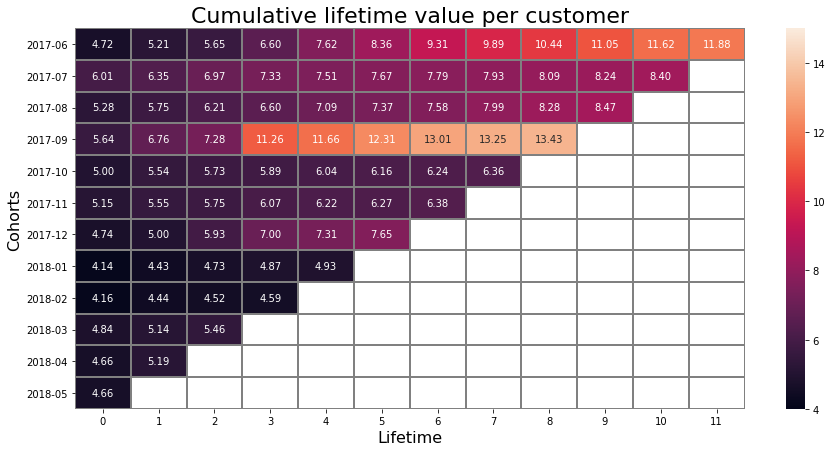

In [76]:
ltv_heatmap.get_cohorts_heatmap()

Наибольший доход на одного покупателя компания получает в месяц формирования когорты. Во второй месяц существования всех когорт LTV резко падает. Данная тенденция, в основном, обусловлена слабым показателем Retention Rate (об этом выше в данной работе) Со временем LTV падает (в новых когортах в первые месяцы жизни он ниже, чем в более старых)

Рассчитаем LTV средней когорты (нарастающим итогом):

In [77]:
mean_cohort_ltv = ltv_cohorts_pivot.mean(axis=0).round(2)
mean_cohort_ltv

lifetime
0      4.92
1      5.40
2      5.82
3      6.69
4      7.30
5      7.97
6      8.38
7      9.08
8     10.06
9      9.25
10    10.01
11    11.88
dtype: float64

In [78]:
mean_cohort_ltv[5]

7.97

Средний LTV за 6 месяцев после первой покупки равен 7,97 у.е. на одного покупателя. Стоимость привлечения одного покупателя за этот период не должно превышать этой суммы.

**Выводы:**
1. Средний покупатель делает три покупки в течение двух месяцев (1,5 покупки в месяц).
2. Средний чек составляет 15,08 у.е.
3. Доход на одного покупателя (LTV) за 6 месяцев после первой покупки составляет 7,97 у.е. 
4. Наибольший доход приносят более ранние когорты и когорта декабря 2017 года.

<h3>Маркетинг<a id="step3.3"></a></h3>

**Затраты на привлечение покупателей**

In [79]:
total_costs = costs.costs.sum()
total_costs.round(2)

329131.62

**Всего** за рассматриваемый период рекламные расходы составили 329 132 у.е. При этом выручка за весь период (revenue_total) составила 252 054 рубля.

**Затраты по источникам привлечения покупателей**

Сгруппируем расходы по месяцам и источникам:

In [80]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
monthly_costs.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Рассчитаем общие затраты по каждому источнику привлечения:

In [81]:
monthly_costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Посмотрим данные на диаграмме:

In [82]:
cac_by_sources_bar_plot = CreateChart(data=monthly_costs.groupby('source_id')['costs'].sum(), 
                                      title='Customer aсquisition costs by sources', 
                                      xlabel='Acquisition sources', ylabel='У.е.', figheight=5)

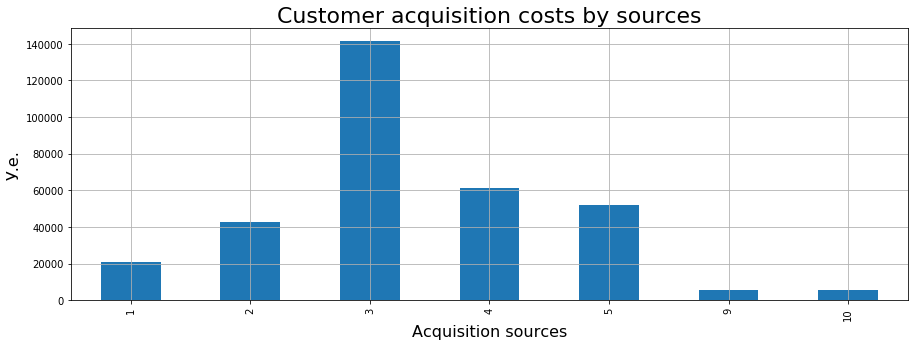

In [83]:
cac_by_sources_bar_plot.get_bar_plot()

Посмотрим на динамику затрат в разрезе каналов привлечения по месяцам:

In [84]:
monthly_costs_pivot = monthly_costs.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum')
monthly_costs_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


Изучим динамику визуально:

In [85]:
cac_by_sources_dynamic_plot = CreateChart(data=monthly_costs_pivot, 
                      title='Customer acquisition costs by source dynamic', 
                      xlabel='Month', ylabel='У.е.')

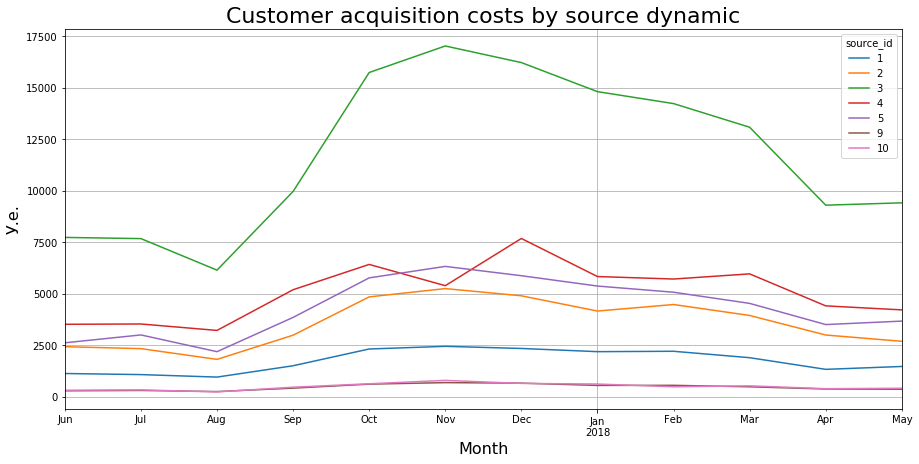

In [86]:
cac_by_sources_dynamic_plot.get_plot()

Самым дорогим каналом привлечения клиентов является канал №3. Самые низкозатратные - каналы №9 и №10. Расходы имеют тенденцию к росту в осенний период.

#### Стоимость привлечения одного покупателя по источникам

Добавим данные о расходах в общие помесячные данные (данные по когортам):

In [87]:
monthly_data = pd.merge(monthly_data, monthly_costs, 
                        left_on=['first_order_month', 'source_id'], right_on=['month', 'source_id'])
monthly_data = monthly_data.drop(['order_month', 'month'], 1) #Удалим лишние столбцы
monthly_data.head()

,first_order_month,lifetime,device,source_id,cohort_size,orders_counts,customers_counts,revenue,costs
0,2017-06-01,0,desktop,1,2023,233,163,1249.17,1125.61
1,2017-06-01,0,touch,1,2023,35,27,129.53,1125.61
2,2017-06-01,1,desktop,1,2023,79,15,413.15,1125.61
3,2017-06-01,1,touch,1,2023,1,1,1.83,1125.61
4,2017-06-01,2,desktop,1,2023,87,10,419.43,1125.61


Рассчитаем стоимость привлечения одного покупателя (CAC) для каждого наблюдения в датафрейме:

In [88]:
monthly_data['cac'] = (monthly_data['costs'] / monthly_data['cohort_size']).round(2)
monthly_data.head()

,first_order_month,lifetime,device,source_id,cohort_size,orders_counts,customers_counts,revenue,costs,cac
0,2017-06-01,0,desktop,1,2023,233,163,1249.17,1125.61,0.56
1,2017-06-01,0,touch,1,2023,35,27,129.53,1125.61,0.56
2,2017-06-01,1,desktop,1,2023,79,15,413.15,1125.61,0.56
3,2017-06-01,1,touch,1,2023,1,1,1.83,1125.61,0.56
4,2017-06-01,2,desktop,1,2023,87,10,419.43,1125.61,0.56


Рассчитаем среднюю стоимость привлечения одного покупателя по каждому источнику привлечения:

In [89]:
cac_by_sources = (monthly_data
    .groupby('source_id')
    .agg({'cac': 'mean'})
    .round(2)
    )
cac_by_sources

,cac
source_id,
1,0.58
2,1.21
3,3.96
4,1.79
5,1.45
9,0.16
10,0.16


Посмотрим данные на диаграмме:

In [90]:
mean_cac_by_sources_bar_plot = CreateChart(data=cac_by_sources, 
                                      title='Mean customer acquisition costs', 
                                      xlabel='Acquisition sources', ylabel='У.е.', figheight=5)

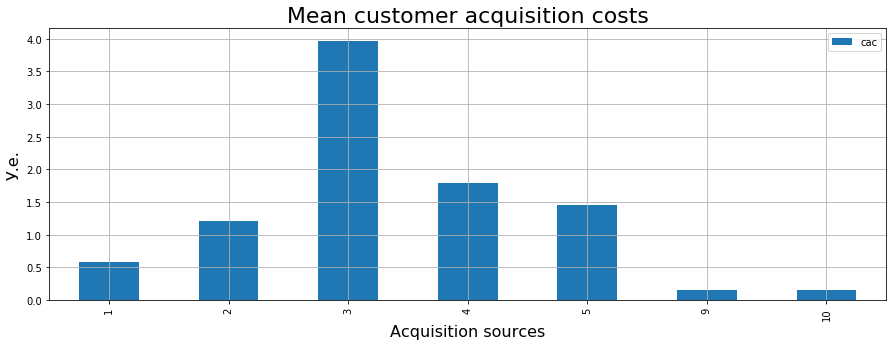

In [91]:
mean_cac_by_sources_bar_plot.get_bar_plot()

Самым дорогим источником (с затратами 3,96 у.е. на одного покупателя) является канал №3.

Самые дешёвые каналы привлечения - №9 и №10 (по 0,16 у.е. на покупателя)

#### Возврат инвестиций в каналы привлечения покупателей (по когортам)

Для рассчёта показателя ROMI необходимо в датафрейм monthly_data добавить показатель LTV:

In [92]:
monthly_data['ltv'] = (monthly_data['revenue'] / monthly_data['cohort_size']).round(2)
monthly_data.head()

,first_order_month,lifetime,device,source_id,cohort_size,orders_counts,customers_counts,revenue,costs,cac,ltv
0,2017-06-01,0,desktop,1,2023,233,163,1249.17,1125.61,0.56,0.62
1,2017-06-01,0,touch,1,2023,35,27,129.53,1125.61,0.56,0.06
2,2017-06-01,1,desktop,1,2023,79,15,413.15,1125.61,0.56,0.20
3,2017-06-01,1,touch,1,2023,1,1,1.83,1125.61,0.56,0.00
4,2017-06-01,2,desktop,1,2023,87,10,419.43,1125.61,0.56,0.21


Рассчитаем **показатель возврата инвестиций в маркетинг (ROMI)**. Для этого поделим ценность, которую приносит клиент за период, на стоимость его привлечения за тот же период):

In [93]:
monthly_data['romi'] = (monthly_data['ltv'] / monthly_data['cac']).round(2)
monthly_data.head()

,first_order_month,lifetime,device,source_id,cohort_size,orders_counts,customers_counts,revenue,costs,cac,ltv,romi
0,2017-06-01,0,desktop,1,2023,233,163,1249.17,1125.61,0.56,0.62,1.11
1,2017-06-01,0,touch,1,2023,35,27,129.53,1125.61,0.56,0.06,0.11
2,2017-06-01,1,desktop,1,2023,79,15,413.15,1125.61,0.56,0.20,0.36
3,2017-06-01,1,touch,1,2023,1,1,1.83,1125.61,0.56,0.00,0.00
4,2017-06-01,2,desktop,1,2023,87,10,419.43,1125.61,0.56,0.21,0.37


Для удобства прочтения трансформируем дату, идентифицирующую когорту, в формат строки:

In [94]:
monthly_data['first_order_month'] = monthly_data['first_order_month'].dt.strftime('%Y-%m')

Посмотрим на показатель ROMI каждого месяца в разрезе когорт (нарастающим итогом):

In [95]:
romi_pivot = monthly_data.pivot_table(index='first_order_month',
    columns='lifetime',
    values='romi',
    aggfunc='mean')
romi_pivot_cumsum = romi_pivot.cumsum(axis=1) #суммируем нарастающим итогом
romi_pivot_cumsum

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.350000,0.396667,0.466667,0.611667,0.732667,0.805667,0.921222,1.016937,1.085118,1.145118,1.199563,1.243313
2017-07,0.362857,0.393857,0.488857,0.521357,0.546357,0.565357,0.583357,0.599357,0.620896,0.638896,0.657896,NaN
2017-08,0.333571,0.365110,0.409277,0.448165,0.489277,0.509277,0.532277,0.569777,0.607277,0.630610,NaN,NaN
2017-09,0.336429,0.419286,0.459286,0.670714,0.703442,0.747442,0.805442,0.833442,0.861775,NaN,NaN,NaN
2017-10,0.387143,0.436310,0.453233,0.464002,0.478168,0.498168,0.504168,0.517168,NaN,NaN,NaN,NaN
2017-11,0.358571,0.386071,0.406071,0.431071,0.444405,0.448571,0.455495,NaN,NaN,NaN,NaN,NaN
2017-12,0.300000,0.321538,0.394266,0.485175,0.510175,0.539175,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.235000,0.255000,0.271667,0.287667,0.291000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.286429,0.303352,0.307897,0.317897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем данные на тепловую карту:

In [96]:
romi_heatmap = CreateChart(data=romi_pivot_cumsum, title='ROMI', fmt='.0%', vmin=0.2, vmax=1)

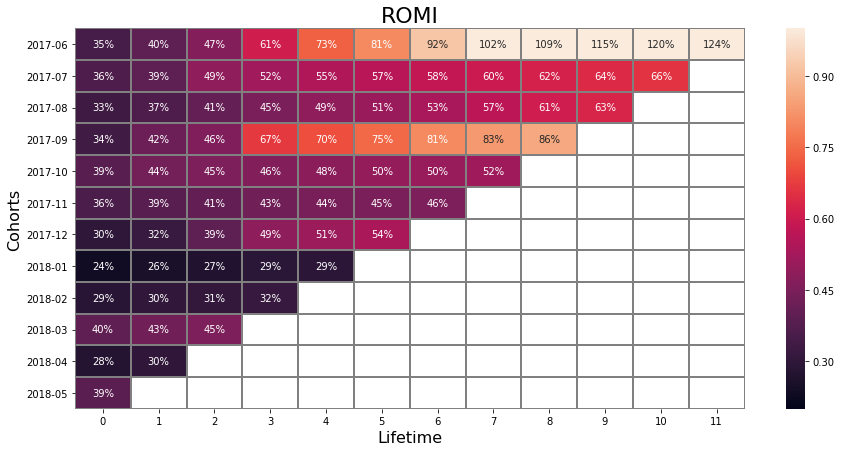

In [97]:
romi_heatmap.get_cohorts_heatmap()

В большинстве когорт затраты на привлечение покупателей за рассматриваемый период не окупились. Затраты окупились на 8 месяц только в когорте июня 2017 года. Темп возврата инвестиций в маркетинг следующих 4-х когорт гораздо ниже (остальные когорты младше 8-ми месяцев). Самая высокая доля возврата инвестиций в первый месяц существования когорт, далее темп резко падает, что является следствием низкого показателя Retention.

Рассчитаем окупаемость инвестиций в маркетинг **(ROMI) в средней когорте**:

In [98]:
romi_pivot_cumsum.mean(axis=0).round(2)

lifetime
0     0.33
1     0.36
2     0.41
3     0.47
4     0.52
5     0.59
6     0.63
7     0.71
8     0.79
9     0.80
10    0.93
11    1.24
dtype: float64

В среднем, **когорты окупаются на двенадцатый месяц** своего существования.

#### ROMI по источникам привлечения и устройствам

Создадим массив с источниками привлечения покупателей:

In [99]:
source_ids = monthly_data.source_id.unique()
source_ids

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

Создадим массив типов устройств покупателей:

In [100]:
devices = monthly_data.device.unique()
devices

array(['desktop', 'touch'], dtype=object)

Рассчитаем показатель **ROMI (нарастающим итогом) для разных устройств и источников привлечения** на протяжении жизни когорт:

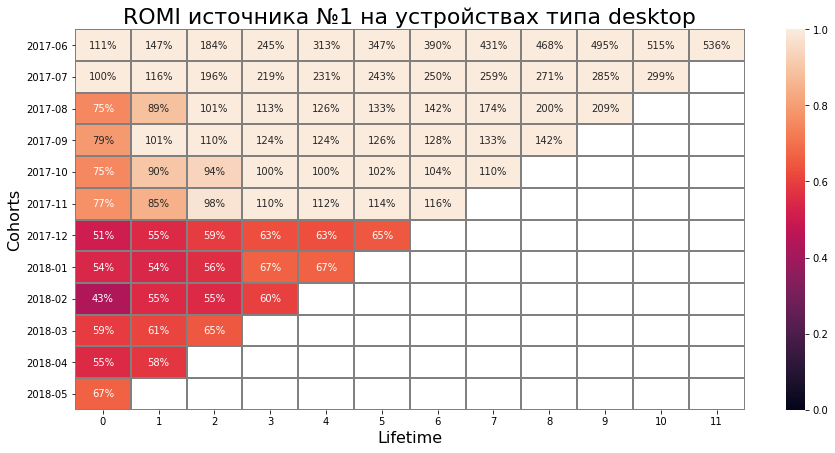

ROMI средней когорты по источнику №1 на устройствах типа desktop
lifetime
0     0.70
1     0.83
2     1.02
3     1.22
4     1.42
5     1.61
6     1.88
7     2.21
8     2.70
9     3.30
10    4.07
11    5.36
dtype: float64

ROMI средней когорты по источнику №1 на устройствах типа desktop за 6 месяцев
1.61


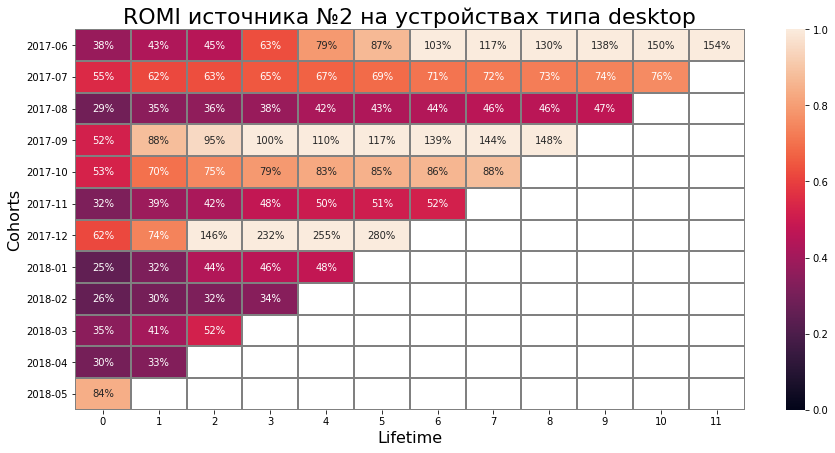

ROMI средней когорты по источнику №2 на устройствах типа desktop
lifetime
0     0.43
1     0.50
2     0.63
3     0.78
4     0.92
5     1.05
6     0.83
7     0.93
8     0.99
9     0.86
10    1.13
11    1.54
dtype: float64

ROMI средней когорты по источнику №2 на устройствах типа desktop за 6 месяцев
1.05


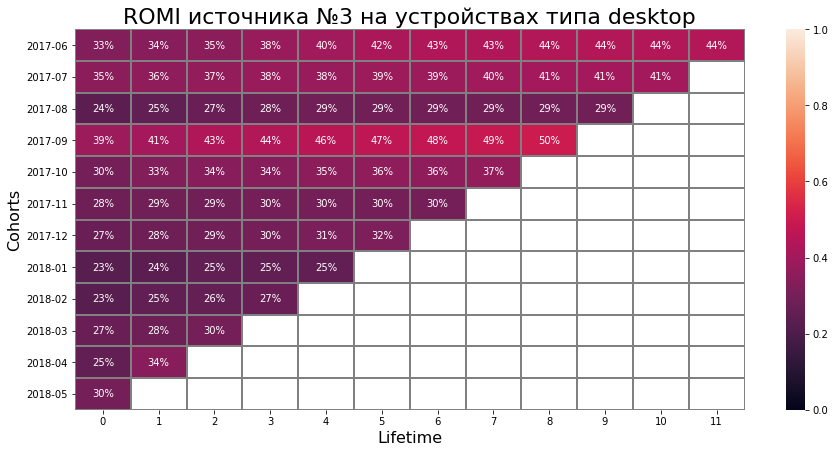

ROMI средней когорты по источнику №3 на устройствах типа desktop
lifetime
0     0.29
1     0.31
2     0.31
3     0.33
4     0.34
5     0.36
6     0.38
7     0.40
8     0.41
9     0.38
10    0.43
11    0.44
dtype: float64

ROMI средней когорты по источнику №3 на устройствах типа desktop за 6 месяцев
0.36


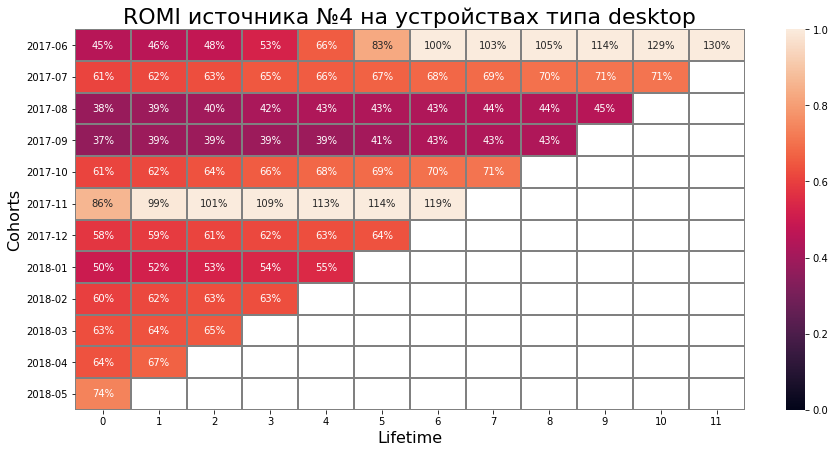

ROMI средней когорты по источнику №4 на устройствах типа desktop
lifetime
0     0.58
1     0.59
2     0.60
3     0.61
4     0.64
5     0.69
6     0.74
7     0.66
8     0.66
9     0.77
10    1.00
11    1.30
dtype: float64

ROMI средней когорты по источнику №4 на устройствах типа desktop за 6 месяцев
0.69


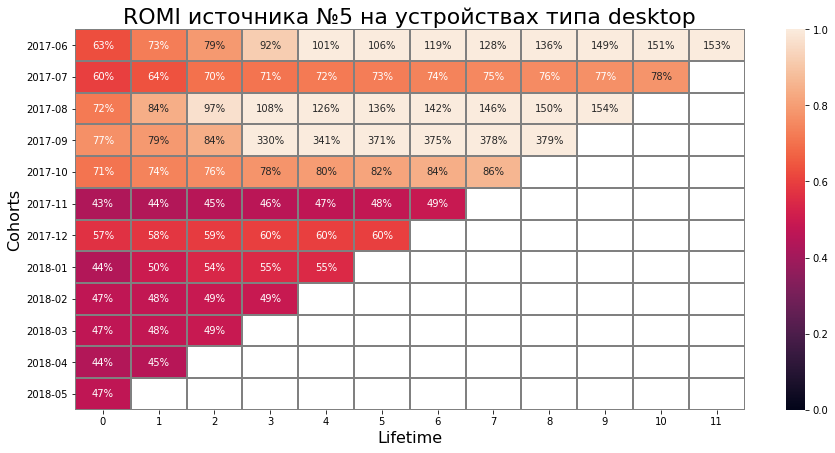

ROMI средней когорты по источнику №5 на устройствах типа desktop
lifetime
0     0.56
1     0.61
2     0.66
3     0.99
4     1.10
5     1.25
6     1.40
7     1.63
8     1.85
9     1.27
10    1.14
11    1.53
dtype: float64

ROMI средней когорты по источнику №5 на устройствах типа desktop за 6 месяцев
1.25


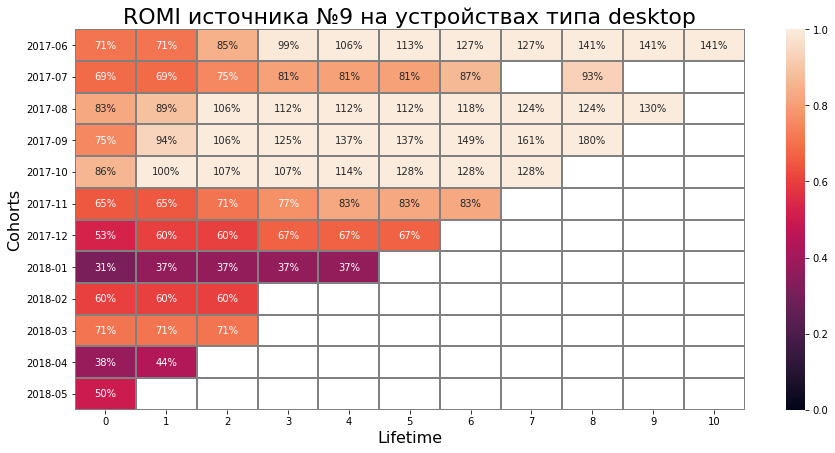

ROMI средней когорты по источнику №9 на устройствах типа desktop
lifetime
0     0.63
1     0.69
2     0.78
3     0.88
4     0.92
5     1.03
6     1.15
7     1.35
8     1.35
9     1.36
10    1.41
dtype: float64

ROMI средней когорты по источнику №9 на устройствах типа desktop за 6 месяцев
1.03


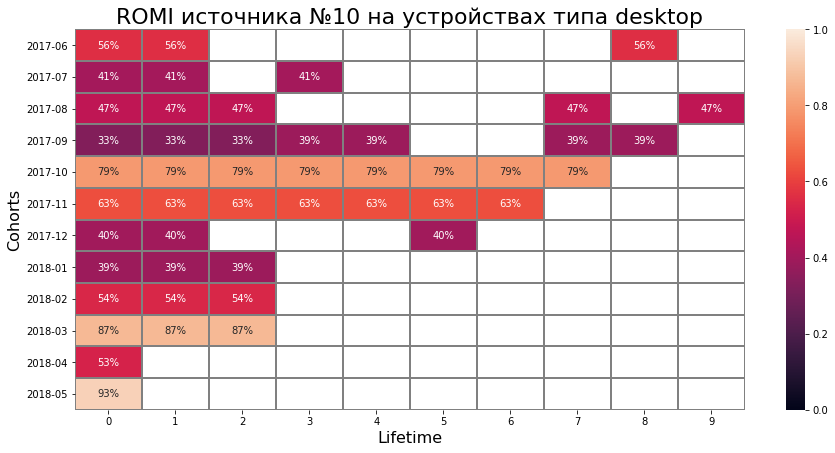

ROMI средней когорты по источнику №10 на устройствах типа desktop
lifetime
0    0.57
1    0.54
2    0.57
3    0.56
4    0.60
5    0.61
6    0.71
7    0.55
8    0.48
9    0.47
dtype: float64

ROMI средней когорты по источнику №10 на устройствах типа desktop за 6 месяцев
0.61


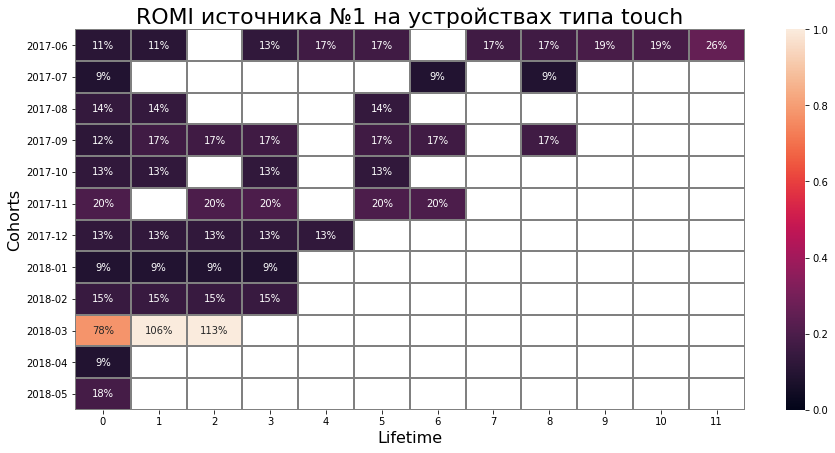

ROMI средней когорты по источнику №1 на устройствах типа touch
lifetime
0     0.18
1     0.25
2     0.31
3     0.14
4     0.15
5     0.16
6     0.15
7     0.17
8     0.14
9     0.19
10    0.19
11    0.26
dtype: float64

ROMI средней когорты по источнику №1 на устройствах типа touch за 6 месяцев
0.16


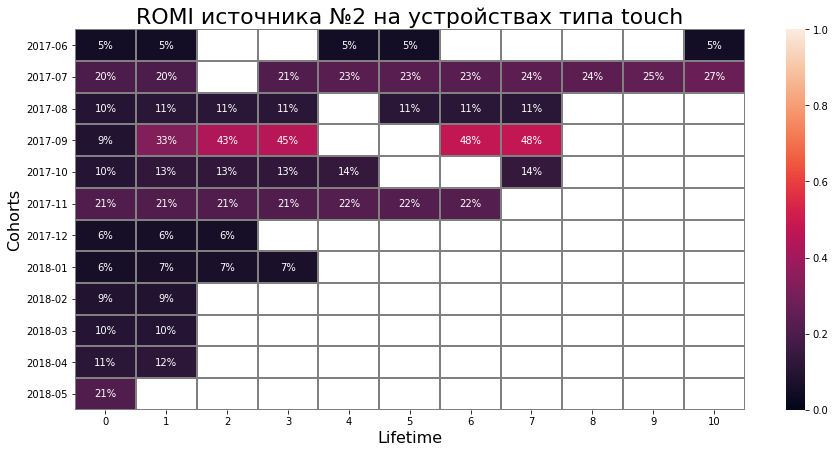

ROMI средней когорты по источнику №2 на устройствах типа touch
lifetime
0     0.12
1     0.13
2     0.17
3     0.20
4     0.16
5     0.15
6     0.26
7     0.24
8     0.24
9     0.25
10    0.16
dtype: float64

ROMI средней когорты по источнику №2 на устройствах типа touch за 6 месяцев
0.15


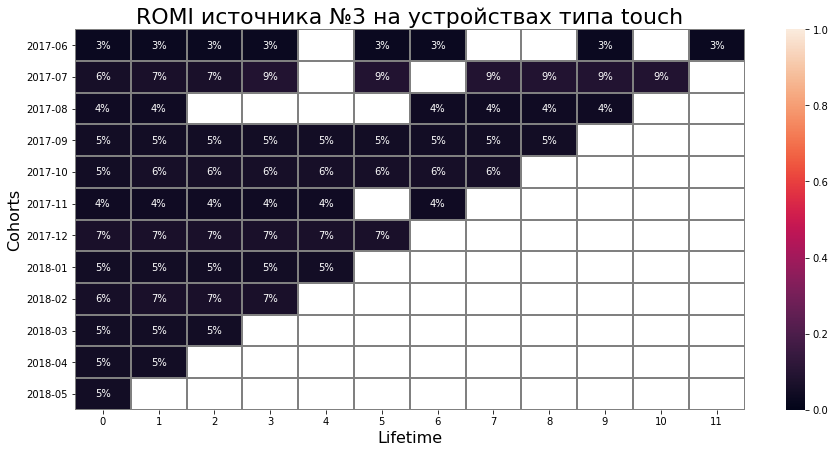

ROMI средней когорты по источнику №3 на устройствах типа touch
lifetime
0     0.05
1     0.05
2     0.05
3     0.06
4     0.05
5     0.06
6     0.04
7     0.06
8     0.06
9     0.05
10    0.09
11    0.03
dtype: float64

ROMI средней когорты по источнику №3 на устройствах типа touch за 6 месяцев
0.06


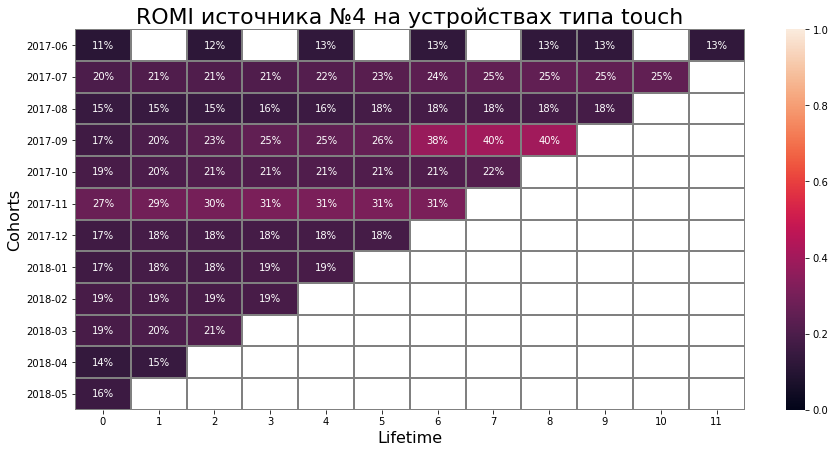

ROMI средней когорты по источнику №4 на устройствах типа touch
lifetime
0     0.18
1     0.19
2     0.20
3     0.21
4     0.21
5     0.23
6     0.24
7     0.26
8     0.24
9     0.19
10    0.25
11    0.13
dtype: float64

ROMI средней когорты по источнику №4 на устройствах типа touch за 6 месяцев
0.23


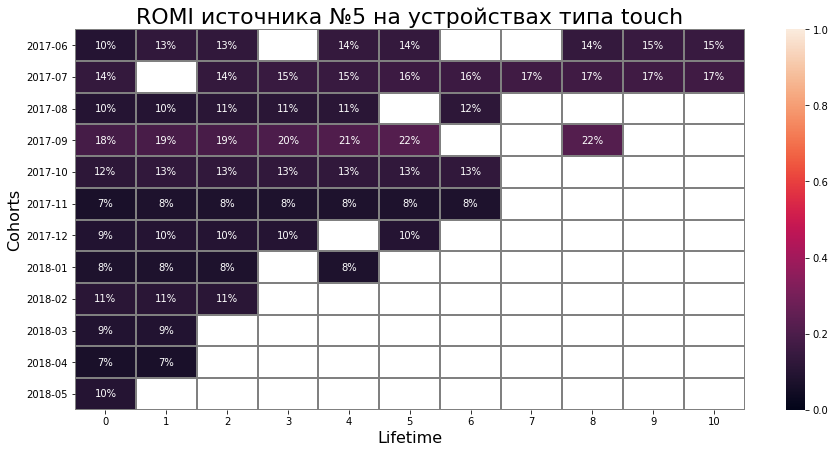

ROMI средней когорты по источнику №5 на устройствах типа touch
lifetime
0     0.10
1     0.11
2     0.12
3     0.13
4     0.13
5     0.14
6     0.12
7     0.17
8     0.18
9     0.16
10    0.16
dtype: float64

ROMI средней когорты по источнику №5 на устройствах типа touch за 6 месяцев
0.14


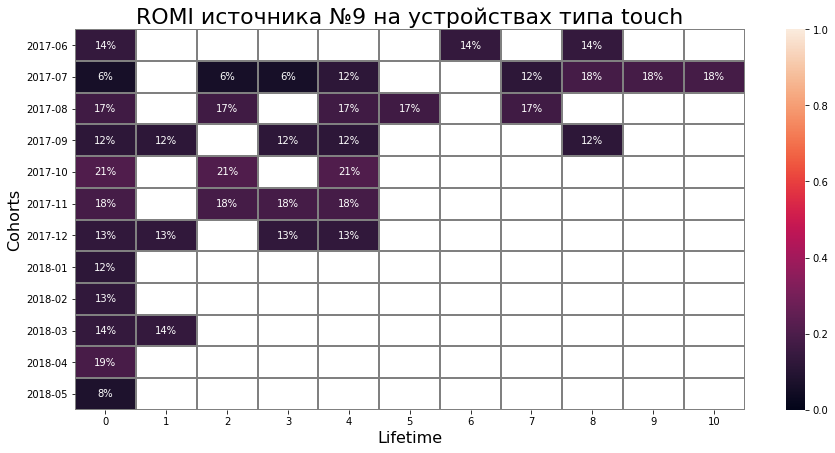

ROMI средней когорты по источнику №9 на устройствах типа touch
lifetime
0     0.14
1     0.13
2     0.16
3     0.12
4     0.16
5     0.17
6     0.14
7     0.15
8     0.15
9     0.18
10    0.18
dtype: float64

ROMI средней когорты по источнику №9 на устройствах типа touch за 6 месяцев
0.17


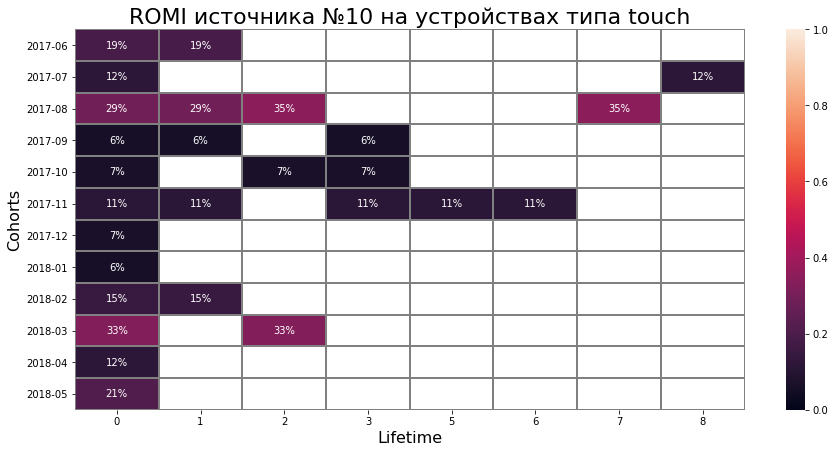

ROMI средней когорты по источнику №10 на устройствах типа touch
lifetime
0    0.15
1    0.16
2    0.25
3    0.08
5    0.11
6    0.11
7    0.35
8    0.12
dtype: float64

ROMI средней когорты по источнику №10 на устройствах типа touch за 6 месяцев
0.11


In [101]:
for device in devices:              #Для каждого типа устройств
    
    for source in source_ids:       #проходим циклом по каждому источнику привлечения
        
        detaled_romi_pivot = (monthly_data
                              .query('device==@device & source_id==@source')  # срезы по устройству и источнику 
                              .pivot_table(index='first_order_month',
                                  columns='lifetime',
                                  values='romi',
                                  aggfunc='sum')
                             )
        detaled_romi_pivot = detaled_romi_pivot.cumsum(axis=1) #суммируем нарастающим итогом
        mean_cohort_detaled_romi = detaled_romi_pivot.mean(axis=0).round(2) #рассчитываем ROMI средней когорты
    
        #Отрисовываем тепловую карту:
        source_romi_heatmap = CreateChart(data=detaled_romi_pivot, 
                                          title='ROMI источника №{} на устройствах типа {}'.format(source, device), 
                                          fmt='.0%', vmin=0, vmax=1)
        source_romi_heatmap.get_cohorts_heatmap()
        
        #Выводим информацию о средней когорте:
        print('ROMI средней когорты по источнику №{} на устройствах типа {}'.format(source, device))
        print(mean_cohort_detaled_romi)
        print()
        
        #Выводим ROMI средней когорты за 6 месяцев:
        print('ROMI средней когорты по источнику №{} на устройствах типа {} за 6 месяцев'.format(source, device))
        print(mean_cohort_detaled_romi[5])

Учитывая **показатель ROMI на 6 месяц в средней когорте для покупателей с desktop устройствами**, можно сделать вывод о том, что на 6 месяц существования когорт в среднем:
- окупились источники №1, №2, №5 и №9, при этом самая быстрая окупаемость у источника №1, а у источника №9 есть когорты с нулевыми месячными продажами;
- не окупились источники №3(36% окупаемости затрат), №4(69%) и №10(61%), при этом в некоторых когортах источника №10 есть длительные периоды отсутствия продаж. Источник №4 окупается на 10 месяц, в то время как источники №3 и №10 не окупаются за год.

Учитывая **показатель ROMI на 6 месяц в средней когорте для покупателей с touch устройствами**, можно сделать вывод о том, что на 6 месяц существования когорт в среднем ни один из источников не окупил себя. При этом максимальная окупаемость 23% у источника №4, а минимальная 6% у источника №3. Продажи носят нестабильный характер (все источники имеют когорты с периодами отсутствия продаж).


**Выводы:**
1. Общие затраты на привлечение покупателей составили 329 132 рубля.
2. Самым затратным источником является источник №3. Самыми дешёвыми - источники №9 и №10. При этом в некоторых когортах источник №10 периодически приносил нулевую месячную выручку.
3. Осенью затраты на привлечение покупателей имеют тенденцию к росту.
4. В среднем, инвестиции в привлечение покупателей окупаются на 12 месяц существования когорт.
5. Самые окупаемые источники привлечения покупателей - это источники №1, №2, №5 и №9.
6. Слабые по окупаемости источники  - №3, №4 и №10.
7. Затраты в привлечение покупателей окупаются за счёт покупателей, впервые посетивших ресурс с desktop устройств. Покупатели с touch устройств за полгода возмещают до 23% затрат на их привлечение.

<h2>Общие выводы и рекомендации<a id="step4"></a></h2> 

- Cервис имеет низкий уровень Retention Rate (4-8% во второй месяц жизни когорт) и со временем продолжает снижаться до 2%.
- В среднем покупатели когорты сентября 2017 года делают в 2 раза больше покупок, чем покупатели в других когортах. При этом средний чек здесь также один из самых высоких среди других когорт.
- Расходы на привлечение покупателей в среднем окупаются на 12-й месяц после первой покупки.
- Самым затратным каналом привлечения является источник №3, который за 6 месяцев окупается только на 36%.
- Самым нестабильным каналом привлечения является источник №10, который также показывает слабую окупаемость.
- Самыми эффективными каналами привлечения покупателей являются источники №1, №2, №5 и №9, у которых срок окупаемости затрат в привлечение покупателей на desktop устройствах составил от 3 до 6 месяцев.
- Источник №1 по итогам рассматриваемого годового периода в среднем показал более чем 5-ти кратный возврат инвестиций.
- Для touch устройств окупаемость маркетинговых затрат за 6 месяцев составила от 6% до 23% в зависимости от источника. Затраты на рекламу, показываемую на touch устройствах, в рассматриваемом периоде не окупились ни по одному источнику.
- В целом работа каналов привлечения покупателей более эффективна на desktop устройствах (в среднем, затраты окупаются на 12-й месяц) 

Ориентируясь на показатель ROMI (возврат маркетинговых инвестиций) за 6 месяцев, можно **рекомендовать для привлечения покупателей источники №1, №2, №5 и №9**, окупившие затраты. Источник №1 показывает самую высокую доходность и быструю окупаемость. При этом необходимо **сконцентрироваться на продажах через desktop устройства**.

**Самым убыточным является источник №3**, который является самым дорогим каналом привлечения с самой медленной окупаемостью. **Источник №10**, несмотря на свою относительно малую стоимость, в течение рассмариваемого годового периода также не окупился. При этом покупки привлечённых через этот источник покупателей нестабильны и, по большей части, не повторяются. Данные источники привлечения покупателей тянут общий результат в отрицательные зоны. **От них следует отказаться**.
Также следует **минимизировать или отказаться от затрат на рекламу, ориентированную для показа на touch устройствах**.